## 시각화_대기율

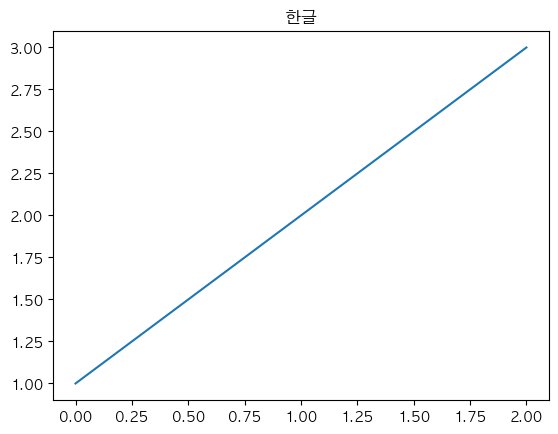

In [1]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

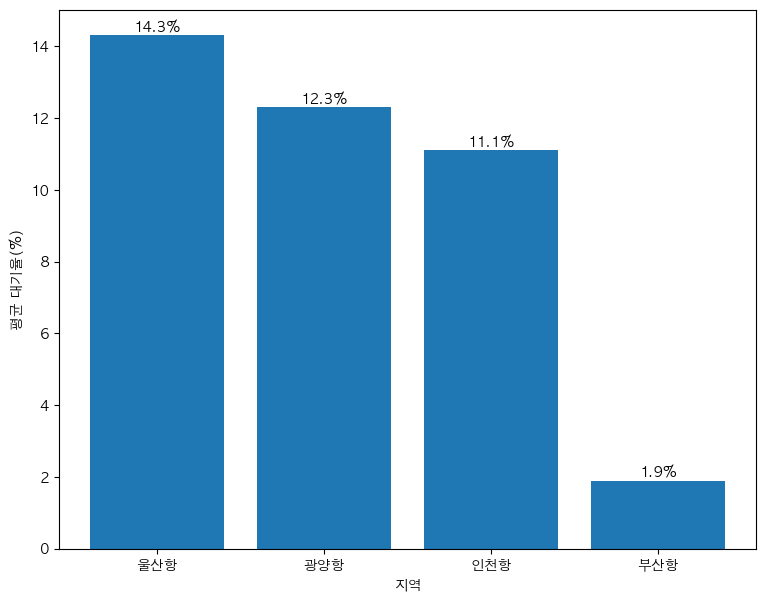

In [2]:
data = {
    '울산항': 0.143032,
    '광양항': 0.123489,
    '인천항': 0.110807,
    '부산항': 0.018844
}

# 각 값을 100을 곱해서 소수점 한자리로 표현
data_percentage = {city: round(value * 100, 1) for city, value in data.items()}

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.figure(figsize=(9, 7))  # 그래프 사이즈 설정

locations = list(data_percentage.keys())
values = list(data_percentage.values())

plt.bar(locations, values)
plt.xlabel('지역')
plt.ylabel('평균 대기율(%)')

# 막대에 값 표시
for i, value in enumerate(values):
    plt.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


In [3]:
import pandas as pd
directory = '../data/울산/'

df = pd.read_csv(directory + '2022_울산_전처리_ver3.csv')

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_12578/763041678.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory + '2022_울산_전처리_ver3.csv')


In [4]:
df.head()

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,...,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,936013,해바다201호,2010.0,1.0,최종,출항,11,2010-11-10 06:00,2022-03-28 05:55,...,4155 days 23:55:00,0,4155,0,0,0,4155,23,5984635,0.0
1,울산,814441,에스엠103호,2012.0,1.0,최종,출항,19.77,2012-04-28 19:00,2022-10-14 10:31,...,3820 days 15:31:00,0,3820,0,0,0,3820,15,5501731,0.0
2,울산,070157,골든씨2호,2012.0,1.0,최종,출항,24,2012-11-17 09:00,2022-10-21 15:13,...,3625 days 06:13:00,0,3625,0,0,0,3625,6,5220373,0.0
3,울산,134802,해바다206호,2012.0,1.0,최종,출항,10,2012-12-25 06:00,2022-03-28 05:55,...,3379 days 23:55:00,0,3379,0,0,0,3379,23,4867195,0.0
4,울산,144808,케이101호,2014.0,1.0,최종,출항,151,2014-07-20 12:10,2022-09-28 05:40,...,2991 days 17:30:00,0,2991,0,0,0,2991,17,4308090,0.0


In [5]:
temp = df[['선박용도','입항횟수_횟수']].sort_values(by = '입항횟수_횟수', ascending = False)

In [6]:
temp['입항횟수_횟수'].sum()

1211455.0

In [7]:
temp['방문횟수_비율'] = temp['입항횟수_횟수'] / 1211455 * 100

In [8]:
temp = temp.groupby(['선박용도']).sum().reset_index()

In [9]:
temp = temp.sort_values(by = '방문횟수_비율', ascending = False)

In [10]:
tp = temp[['선박용도','방문횟수_비율']]

In [11]:
tp

,선박용도,방문횟수_비율
12,석유제품 운반선,79.363988
27,케미칼 운반선,6.624101
7,기타 유조선,3.863123
2,견인용예선,2.449451
1,LPG 운반선,1.585944
5,급유선,1.447020
6,기타 예선,1.187993
31,풀컨테이너선,0.987655
21,원유운반선,0.658712
24,일반화물선,0.597216


In [12]:
# 데이터프레임을 '선박용도' 열을 기준으로 정렬합니다.
temp = temp.sort_values(by='방문횟수_비율', ascending=False)

# '선박용도_순번'이라는 새로운 열을 만들어 해당 항목에 번호를 부여합니다 (1부터 시작).
temp['순위'] = [idx + 1 for idx, _ in enumerate(temp['선박용도'])]

# 결과 출력
tp = temp[['순위','선박용도',  '방문횟수_비율']]

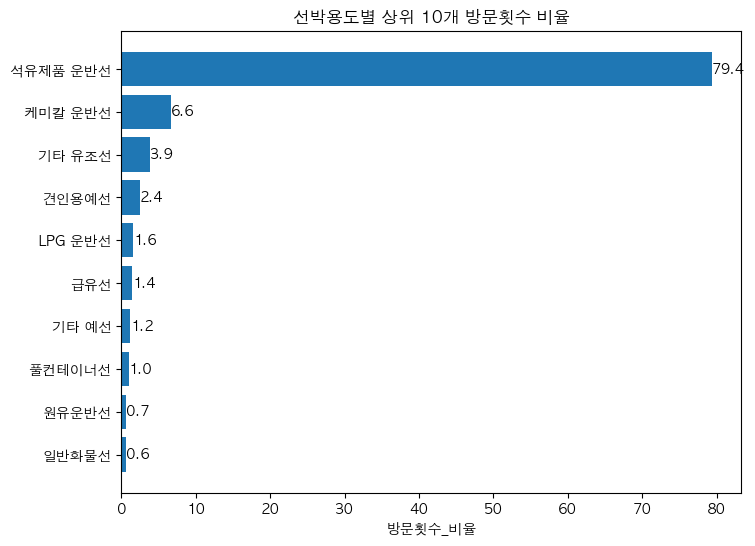

In [13]:
import matplotlib.pyplot as plt

# 데이터 정렬 (위에서부터 아래로)
tp_sorted = tp.sort_values('방문횟수_비율', ascending=True).tail(10)

# 그래프 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 수평 막대 그래프 생성
bars = plt.barh(tp_sorted['선박용도'], tp_sorted['방문횟수_비율'])

# 데이터 레이블 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.1f}",
             va='center', ha='left', color='black')

# 레이블 및 제목 설정
plt.xlabel('방문횟수_비율')
plt.title('선박용도별 상위 10개 방문횟수 비율')

# 그래프 출력
plt.show()


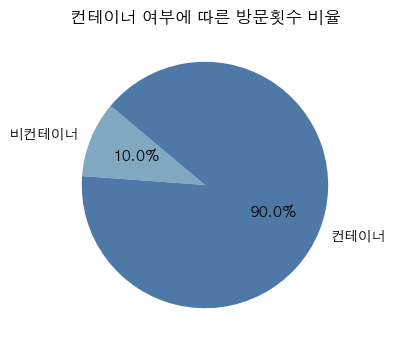

In [14]:
# 새로운 열 '컨테이너_구분'을 생성하여 '운반' 또는 '컨테이너' 단어 포함 여부로 구분
tp['컨테이너_구분'] = tp['선박용도'].apply(lambda x: '컨테이너' if '운반' in x or '컨테이너' in x else '비컨테이너')

# '컨테이너_구분'별로 '방문횟수_비율'의 합을 구함
container_sum = tp.groupby('컨테이너_구분')['방문횟수_비율'].sum()

# 시각화
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

# 파이 차트 생성 (파란색 계열)
colors = ['#81a8c1','#4e79a7']  # 두 가지 파란색 계열 색상
plt.pie(container_sum, labels=container_sum.index, autopct='%1.1f%%', startangle=140, colors=colors)

# 제목 설정
plt.title('컨테이너 여부에 따른 방문횟수 비율')

# 차트 출력
plt.show()


In [15]:
temp = df[['선박용도','대기율']].sort_values(by = '대기율', ascending = False)

In [16]:
temp

,선박용도,대기율
17441,케미칼 운반선,4.901786
43700,케미칼 운반선,4.892308
30036,석유제품 운반선,4.890000
16252,케미칼 운반선,4.887931
28013,케미칼 운반선,4.877049
...,...,...
17590,석유제품 운반선,0.000000
17591,석유제품 운반선,0.000000
17592,석유제품 운반선,0.000000
17593,석유제품 운반선,0.000000


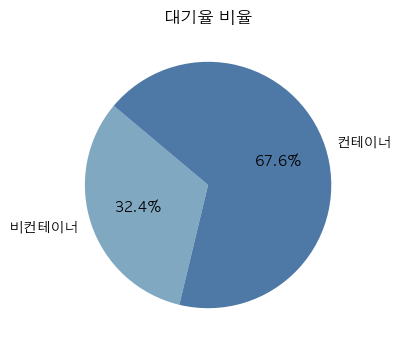

In [17]:
# 새로운 열 '컨테이너_구분'을 생성하여 '운반' 또는 '컨테이너' 단어 포함 여부로 구분
temp['컨테이너_구분'] = temp['선박용도'].apply(lambda x: '컨테이너' if '운반' in x or '컨테이너' in x else '비컨테이너')

# '컨테이너_구분'별로 '방문횟수_비율'의 합을 구함
container_sum = temp.groupby('컨테이너_구분')['대기율'].mean()

# 시각화
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

# 파이 차트 생성 (파란색 계열)
colors = ['#81a8c1','#4e79a7']  # 두 가지 파란색 계열 색상
plt.pie(container_sum, labels=container_sum.index, autopct='%1.1f%%', startangle=140, colors=colors)

# 제목 설정
plt.title('대기율 비율')

# 차트 출력
plt.show()


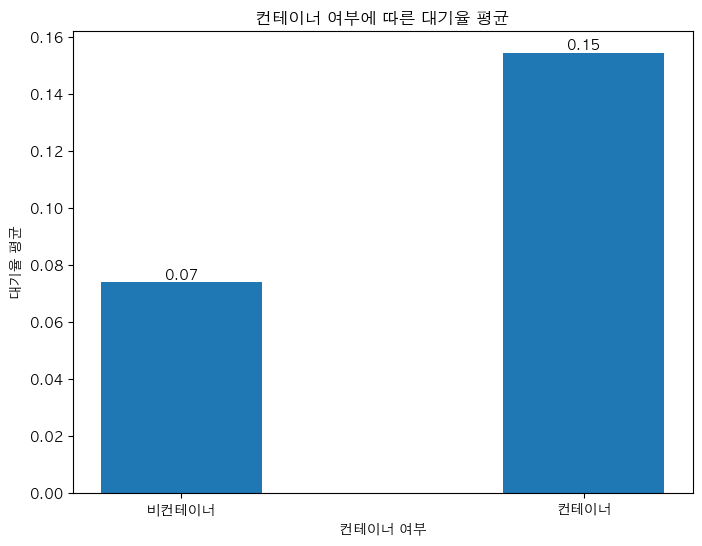

In [18]:
import matplotlib.pyplot as plt

# 새로운 열 '컨테이너_구분'을 생성하여 '운반' 또는 '컨테이너' 단어 포함 여부로 구분
temp['컨테이너_구분'] = temp['선박용도'].apply(lambda x: '컨테이너' if '운반' in x or '컨테이너' in x else '비컨테이너')

# '컨테이너_구분'별로 '대기율'의 평균을 구함
container_mean = temp.groupby('컨테이너_구분')['대기율'].mean()

# 시각화 - 막대 그래프
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 막대 그래프 생성 (막대 두께 및 간격 조정)
bars = plt.bar(container_mean.index, container_mean, width=0.4)  # 막대 폭과 테두리 색상 지정

# 데이터 레이블 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}",
             ha='center', va='bottom', fontsize=10)

# 축 및 제목 설정
plt.xlabel('컨테이너 여부')
plt.ylabel('대기율 평균')
plt.title('컨테이너 여부에 따른 대기율 평균')

# 그래프 출력
plt.show()


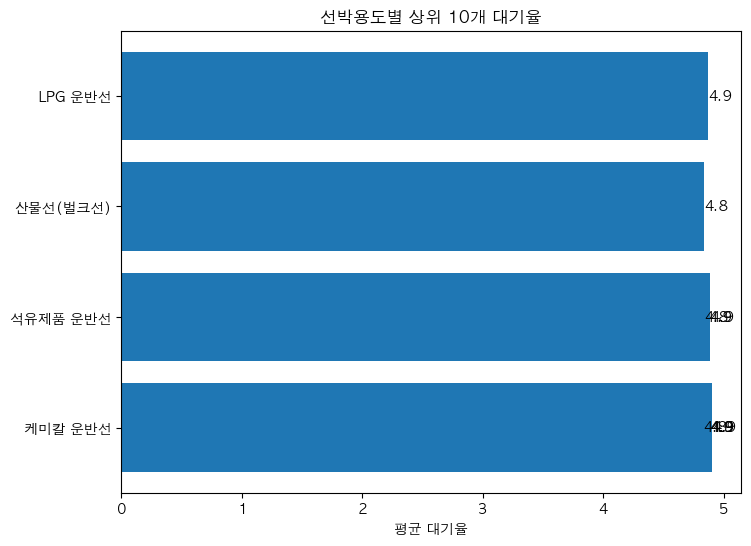

In [21]:
import matplotlib.pyplot as plt

# 데이터 정렬 (위에서부터 아래로)
tp_sorted = temp.sort_values('대기율', ascending=True).tail(10)

# 그래프 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 수평 막대 그래프 생성
bars = plt.barh(tp_sorted['선박용도'], tp_sorted['대기율'])

# 데이터 레이블 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.1f}",
             va='center', ha='left', color='black')

# 레이블 및 제목 설정
plt.xlabel('평균 대기율')
plt.title('선박용도별 상위 10개 대기율')

# 그래프 출력
plt.show()


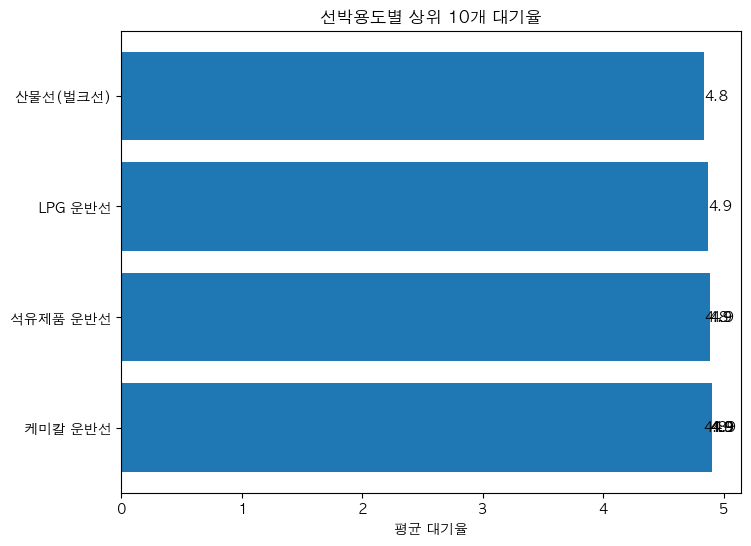

In [22]:
import matplotlib.pyplot as plt

# 데이터 정렬 (상위 10개)
tp_sorted = temp.sort_values('대기율', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 수평 막대 그래프 생성
bars = plt.barh(tp_sorted['선박용도'], tp_sorted['대기율'])

# 데이터 레이블 표시
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.1f}",
             va='center', ha='left', color='black')

# 레이블 및 제목 설정
plt.xlabel('평균 대기율')
plt.title('선박용도별 상위 10개 대기율')

# 그래프 출력
plt.show()
